In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
city=pd.read_csv('City_Zhvi_AllHomes.csv')

In [3]:
city.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,196258.0,195693.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,185649.0,185625.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,93518.0,93633.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,130920.0,130772.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94041.0,94007.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0


In [4]:
# Use this dictionary to map state names to two letter acronyms
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 
          'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 
          'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 
          'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 
          'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 
          'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 
          'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana',
          'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma','FL': 'Florida', 'CA': 'California', 
          'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 
          'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 
          'ND': 'North Dakota', 'VA': 'Virginia'}

In [5]:
city['State'] = [states[s] for s in city['State']]

 

In [6]:
city=city.drop(['RegionID','SizeRank','RegionType','StateName','Metro','CountyName'], axis=1)

In [7]:
city=city.drop(city.columns[ list(range(2,50))], axis=1)

In [8]:
city.iloc[:,15]

0       276822.0
1       261645.0
2       108987.0
3       176385.0
4       100036.0
          ...   
8099    146711.0
8100    189966.0
8101    119343.0
8102         NaN
8103     98552.0
Name: 2001-02-28, Length: 8104, dtype: float64

In [9]:
for col in city.columns:
        city.rename(columns={f'{col}':f'{col[:-3]}'},inplace=True)

In [12]:
city

,RegionN,St,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,...,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,New York,New York,240658.0,243340.0,246394.0,249453.0,252310.0,254992.0,257707.0,260099.0,...,659421.0,659007.0,658239.0,656925.0,655613.0,654394.0,653930.0,653901.0,653565.0,652307.0
1,Los Angeles,California,234614.0,236153.0,238117.0,240155.0,242487.0,244496.0,246431.0,248748.0,...,712660.0,713807.0,715688.0,718245.0,721896.0,725180.0,730358.0,735910.0,744137.0,752508.0
2,Houston,Texas,106168.0,106308.0,106252.0,106293.0,106310.0,106494.0,106681.0,107047.0,...,186844.0,187464.0,188070.0,188496.0,189125.0,189612.0,190179.0,190395.0,190938.0,191907.0
3,Chicago,Illinois,156122.0,157825.0,159606.0,161190.0,162862.0,164421.0,165854.0,167269.0,...,248372.0,248646.0,248725.0,248483.0,248278.0,248090.0,248029.0,248220.0,248599.0,249152.0
4,San Antonio,Texas,102147.0,102329.0,102397.0,102438.0,101794.0,101151.0,100507.0,100509.0,...,182732.0,183350.0,183930.0,184846.0,185490.0,186244.0,186420.0,186962.0,187129.0,187718.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8099,Pinetop,Arizona,133343.0,134652.0,135744.0,136612.0,137283.0,137959.0,138841.0,139723.0,...,288880.0,290196.0,291775.0,293780.0,295628.0,296994.0,297991.0,299371.0,301380.0,304161.0
8100,La Salle,Colorado,176057.0,177704.0,178644.0,179112.0,179468.0,180559.0,182122.0,184071.0,...,316729.0,317289.0,318151.0,319420.0,321066.0,323566.0,325549.0,328208.0,331695.0,335558.0
8101,Bangor,Pennsylvania,113135.0,113368.0,113718.0,113816.0,113985.0,114011.0,113764.0,114211.0,...,192995.0,193046.0,192463.0,191920.0,192176.0,192840.0,193482.0,193335.0,193527.0,193344.0
8102,Stanley,Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105548.0,106148.0,106840.0,107531.0,108228.0,109077.0,109991.0,110796.0,111555.0,112137.0


In [14]:
dfcity = pd.DataFrame(city[['St', 'RegionN']])
dfcity.rename(columns={'RegionN':'TownName', 'St':'State'},inplace=True)
dfcity

,State,TownName
0,New York,New York
1,California,Los Angeles
2,Texas,Houston
3,Illinois,Chicago
4,Texas,San Antonio
...,...,...
8099,Arizona,Pinetop
8100,Colorado,La Salle
8101,Pennsylvania,Bangor
8102,Wisconsin,Stanley


In [15]:
for year in range(2000, 2020):
        dfcity[str(year) + 'q1'] = city[[str(year) + '-01', str(year) + '-02', str(year) + '-03']].mean(axis = 1)
        dfcity[str(year) + 'q2'] = city[[str(year) + '-04', str(year) + '-05', str(year) + '-06']].mean(axis = 1)
        dfcity[str(year) + 'q3'] = city[[str(year) + '-07', str(year) + '-08', str(year) + '-09']].mean(axis = 1)
        dfcity[str(year) + 'q4'] = city[[str(year) + '-10', str(year) + '-11', str(year) + '-12']].mean(axis = 1)
        
year=2020
dfcity[str(year) + 'q1'] = city[[str(year) + '-01', str(year) + '-02', str(year) + '-03']].mean(axis = 1)


In [16]:
dfcity.describe()

,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,2002q1,2002q2,...,2017q4,2018q1,2018q2,2018q3,2018q4,2019q1,2019q2,2019q3,2019q4,2020q1
count,5.974000e+03,5.994000e+03,6.011000e+03,6.030000e+03,6.086000e+03,6.130000e+03,6.173000e+03,6.184000e+03,6.199000e+03,6.217000e+03,...,8.100000e+03,8.103000e+03,8.103000e+03,8.103000e+03,8.103000e+03,8.103000e+03,8.103000e+03,8.103000e+03,8.103000e+03,8.103000e+03
mean,1.596484e+05,1.627768e+05,1.661117e+05,1.696696e+05,1.730192e+05,1.762237e+05,1.789920e+05,1.820159e+05,1.848895e+05,1.880803e+05,...,2.559956e+05,2.602164e+05,2.640290e+05,2.670285e+05,2.693122e+05,2.708495e+05,2.721621e+05,2.740450e+05,2.763417e+05,2.793081e+05
std,1.065489e+05,1.107881e+05,1.157233e+05,1.209132e+05,1.256169e+05,1.294118e+05,1.317261e+05,1.339712e+05,1.358459e+05,1.389487e+05,...,2.443435e+05,2.517939e+05,2.568977e+05,2.601228e+05,2.599585e+05,2.571607e+05,2.556647e+05,2.557169e+05,2.576587e+05,2.625137e+05
min,1.930067e+04,2.024000e+04,2.038100e+04,2.095033e+04,2.153200e+04,2.233633e+04,2.257300e+04,2.251133e+04,2.263633e+04,2.282167e+04,...,1.968667e+04,2.030467e+04,2.063900e+04,2.141700e+04,2.191567e+04,2.259700e+04,2.282100e+04,2.318800e+04,2.383667e+04,2.461467e+04
25%,9.706858e+04,9.804617e+04,9.887667e+04,1.002983e+05,1.017662e+05,1.029532e+05,1.040187e+05,1.051939e+05,1.063375e+05,1.074733e+05,...,1.283245e+05,1.300448e+05,1.319767e+05,1.338278e+05,1.353635e+05,1.372377e+05,1.390442e+05,1.407178e+05,1.423815e+05,1.439347e+05
50%,1.362090e+05,1.379887e+05,1.395737e+05,1.416850e+05,1.434920e+05,1.457668e+05,1.474807e+05,1.492453e+05,1.511770e+05,1.529973e+05,...,1.922958e+05,1.951457e+05,1.981540e+05,2.009710e+05,2.035170e+05,2.058137e+05,2.077047e+05,2.099233e+05,2.121170e+05,2.144987e+05
75%,1.894948e+05,1.930035e+05,1.964947e+05,2.004283e+05,2.040909e+05,2.079917e+05,2.113613e+05,2.155209e+05,2.196957e+05,2.242287e+05,...,2.985828e+05,3.029867e+05,3.076668e+05,3.105208e+05,3.138447e+05,3.170888e+05,3.192908e+05,3.214252e+05,3.244145e+05,3.281992e+05
max,1.898902e+06,1.974104e+06,2.102403e+06,2.249650e+06,2.357564e+06,2.433705e+06,2.461326e+06,2.472597e+06,2.486127e+06,2.597211e+06,...,5.535993e+06,5.803945e+06,5.959083e+06,6.130385e+06,6.209298e+06,6.166849e+06,6.160602e+06,6.203112e+06,6.293867e+06,6.551534e+06


In [43]:
dfcity.isnull()

,State,TownName,2000q1,2000q2,2000q3,2000q4,2001q1,2001q2,2001q3,2001q4,...,2017q4,2018q1,2018q2,2018q3,2018q4,2019q1,2019q2,2019q3,2019q4,2020q1
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8102,False,False,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [44]:
dfcity.isnull().sum()

State          0
TownName       0
2000q1      2130
2000q2      2110
2000q3      2093
            ... 
2019q1         1
2019q2         1
2019q3         1
2019q4         1
2020q1         1
Length: 83, dtype: int64

In [45]:
dfcity.isnull().sum().max()

2130

In [46]:
mean=dfcity.iloc[:,3:].apply(np.mean)

In [53]:
len(mean)

80

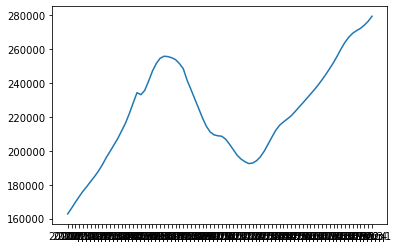

In [47]:
plt.plot(mean)

In [54]:
mean[:70].idxmax()

'2006q3'

In [57]:
mean[30:].idxmin()

'2012q1'

According to above graph we can see the mean the price of the houses are increases until Aguste 2006 and then it decreases untill march 2012 and after that increases.


In [24]:
with open('university_towns.txt') as uni:
    for line in uni:
        print(line)

Alabama

Auburn (Auburn University, Edward Via College of Osteopathic Medicine)[8]

Dothan (Fortis College, Troy University Dothan Campus, Alabama College of Osteopathic Medicine)

Fairfield (Miles College)

Florence (Heritage Christian University, University of North Alabama)

Homewood (Samford University)

Huntsville (University of Alabama, Huntsville, Alabama A&M University)

Jacksonville (Jacksonville State University)[9]

Livingston (University of West Alabama)[9]

Marion (Judson College (Alabama))

Mobile (Spring Hill College, University of South Alabama)[10]

Montevallo (University of Montevallo, Faulkner University)[9]

Montgomery (Alabama State University, Huntingdon College, Auburn University at Montgomery, H. Councill Trenholm State Technical College, Faulkner University)

Troy (Troy University)[9][11]

Tuscaloosa (University of Alabama, Stillman College, Shelton State)[12][13]

Tuskegee (Tuskegee University)[14]

Alaska

Anchorage (University of Alaska Anchorage)

Fairbanks

In [25]:
def get_list_of_university_towns():
        data = []
        with open('university_towns.txt') as uni:
            for line in uni:
                data.append(line[:-1])         
            state_town = []
            for line in data:
                if '(' not in line:
                    state=line
                elif '(' in line:
                    town = line[:line.index('(')-1]
                    state_town.append([state,town])
                else:
                    town = line
                    state_town.append([state,town])
        state_college_df = pd.DataFrame(state_town,columns = ['State','TownName'])
        return state_college_df
    


In [26]:
get_list_of_university_towns()

,State,TownName
0,Alabama,Auburn
1,Alabama,Dothan
2,Alabama,Fairfield
3,Alabama,Florence
4,Alabama,Homewood
...,...,...
805,Wisconsin,Whitewater
806,Wyoming,Laramie
807,Puerto Rico,"Mayagüez, Puerto Rico"
808,Puerto Rico,"Ponce, Puerto Rico"


In [27]:
GDPf= pd.read_excel('gdplev.xls')
GDPf

,"Current-Dollar and ""Real"" Gross Domestic Product",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,2016-09-29 00:00:00
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Annual,NaN,NaN,NaN,Quarterly,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,(Seasonally adjusted annual rates),NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN,NaN,GDP in billions of current dollars,GDP in billions of chained 2009 dollars,NaN
...,...,...,...,...,...,...,...,...
280,NaN,NaN,NaN,NaN,2015q2,17998.3,16374.2,NaN
281,NaN,NaN,NaN,NaN,2015q3,18141.9,16454.9,NaN
282,NaN,NaN,NaN,NaN,2015q4,18222.8,16490.7,NaN
283,NaN,NaN,NaN,NaN,2016q1,18281.6,16525,NaN


In [28]:
GDP = GDPf[['Unnamed: 4', 'Unnamed: 5']]
GDP = pd.DataFrame(GDP.loc[212:])
GDP=GDP.rename(columns={"Unnamed: 4": "Quarter", "Unnamed: 5": "GDP"})
GDP

,Quarter,GDP
212,1998q2,8994.7
213,1998q3,9146.5
214,1998q4,9325.7
215,1999q1,9447.1
216,1999q2,9557
...,...,...
280,2015q2,17998.3
281,2015q3,18141.9
282,2015q4,18222.8
283,2016q1,18281.6


In [58]:
quarters=[]
for i in range(len(GDP) - 2):
        if (GDP.iloc[i][1] > GDP.iloc[i+1][1]) & (GDP.iloc[i+1][1] > GDP.iloc[i+2][1]):
            quarters.append(GDP.iloc[i][0])

bottom=quarters[0]
bottom

'2008q3'

we get our start date as 2008 Q3.

Recession bottom here means the point where the GDP is lowest.

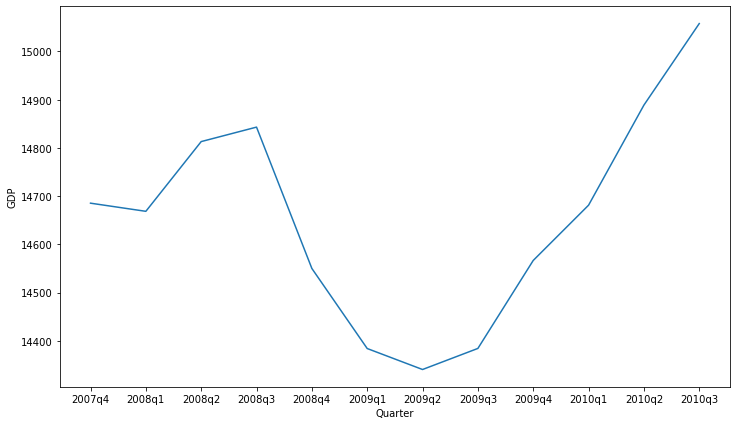

In [37]:
gdp1=GDP.loc[250:261]
plt.figure(figsize=(12,7))
ax = sns.lineplot(x="Quarter", y="GDP", data=gdp1)

In [59]:
recession_end = []
for i in range(len(GDP) - 4):
    if ((GDP.iloc[i][1] > GDP.iloc[i+1][1]) & (GDP.iloc[i+1][1] > GDP.iloc[i+2][1]) & (GDP.iloc[i+2][1] < GDP.iloc[i+3][1]) & (GDP.iloc[i+3][1] < GDP.iloc[i+4][1])):
            recession_end.append([GDP.iloc[i][0],GDP.iloc[i+1][0],GDP.iloc[i+2][0],GDP.iloc[i+3][0],GDP.iloc[i+4][0]])
start=recession_end[0][2]
start

'2009q2'

Recession bottom was observed in 2009 Q2

In [70]:

df=dfcity[['State','TownName',f'{start}',f'{bottom}']]
df

,State,TownName,2009q2,2008q3
0,New York,New York,461307.333333,497311.666667
1,California,Los Angeles,441122.333333,510849.333333
2,Texas,Houston,126925.333333,130583.000000
3,Illinois,Chicago,232649.666667,267684.000000
4,Texas,San Antonio,129005.000000,133287.333333
...,...,...,...,...
8099,Arizona,Pinetop,270631.000000,285303.000000
8100,Colorado,La Salle,172426.000000,179358.333333
8101,Pennsylvania,Bangor,196513.333333,208242.666667
8102,Wisconsin,Stanley,86741.000000,88804.000000


If we want to find out if housing prices in University Towns are less affected, we take a ratio,(Gdp at Start of recession — GDP at bottom of recession)/ Gdp at Start of recession.

In [72]:
df['ratio'] = np.abs( (df[start] - df[bottom])/ df[start])
df

/var/folders/xw/ggml5mhd4n7315516lvx2p6c0000gn/T/ipykernel_15804/4232385031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratio'] = np.abs( (df[start] - df[bottom])/ df[start])


,State,TownName,2009q2,2008q3,ratio
0,New York,New York,461307.333333,497311.666667,0.078048
1,California,Los Angeles,441122.333333,510849.333333,0.158067
2,Texas,Houston,126925.333333,130583.000000,0.028817
3,Illinois,Chicago,232649.666667,267684.000000,0.150588
4,Texas,San Antonio,129005.000000,133287.333333,0.033195
...,...,...,...,...,...
8099,Arizona,Pinetop,270631.000000,285303.000000,0.054214
8100,Colorado,La Salle,172426.000000,179358.333333,0.040205
8101,Pennsylvania,Bangor,196513.333333,208242.666667,0.059687
8102,Wisconsin,Stanley,86741.000000,88804.000000,0.023783
